In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats

In [273]:
df = pd.read_csv('train.csv')
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [274]:
missing_num = test.isnull().sum()
print(missing_num)

ID              0
Order Date      0
Class           0
Region          0
Sub-Category    0
Sales           0
Sale_group      0
dtype: int64


In [275]:
# Обработаем продажи
for count, x in enumerate(df['Sales']):
  df['Sales'][count] = float(x.replace(',', '.'))

# Обработаем дату
for count, x in enumerate(df['Order Date']):
  tmp = x.split('/')
  date = f"{tmp[2]}-{tmp[1]}-{tmp[0]}"
  df['Order Date'][count] = date

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-275-804a97464633>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'][count] = date
<ipython-input-275-804a97464633>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'][count] = date
<ipython-input-275-804a97464633>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'][count] = date
<ipython-input-275-804a97464633>

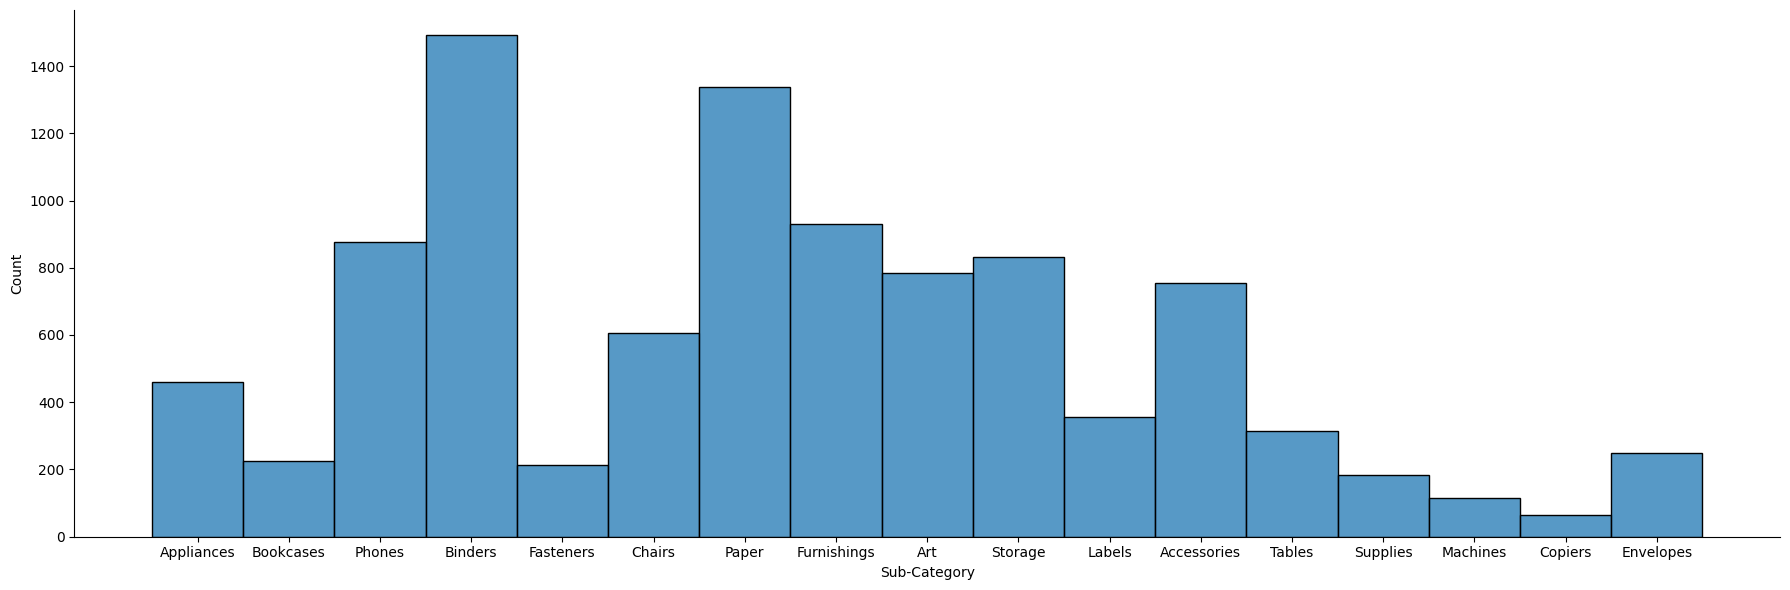

In [276]:
# Построим график
sns.displot(df['Sub-Category'], height=6, aspect=3)

In [277]:
# Получим максимальную дату
df['Order Date'].max()

'2018-12-30'

,count
Sub-Category,
Binders,907
Paper,810
Furnishings,558
Phones,511
Storage,492
Art,458
Accessories,450
Chairs,348
Appliances,274


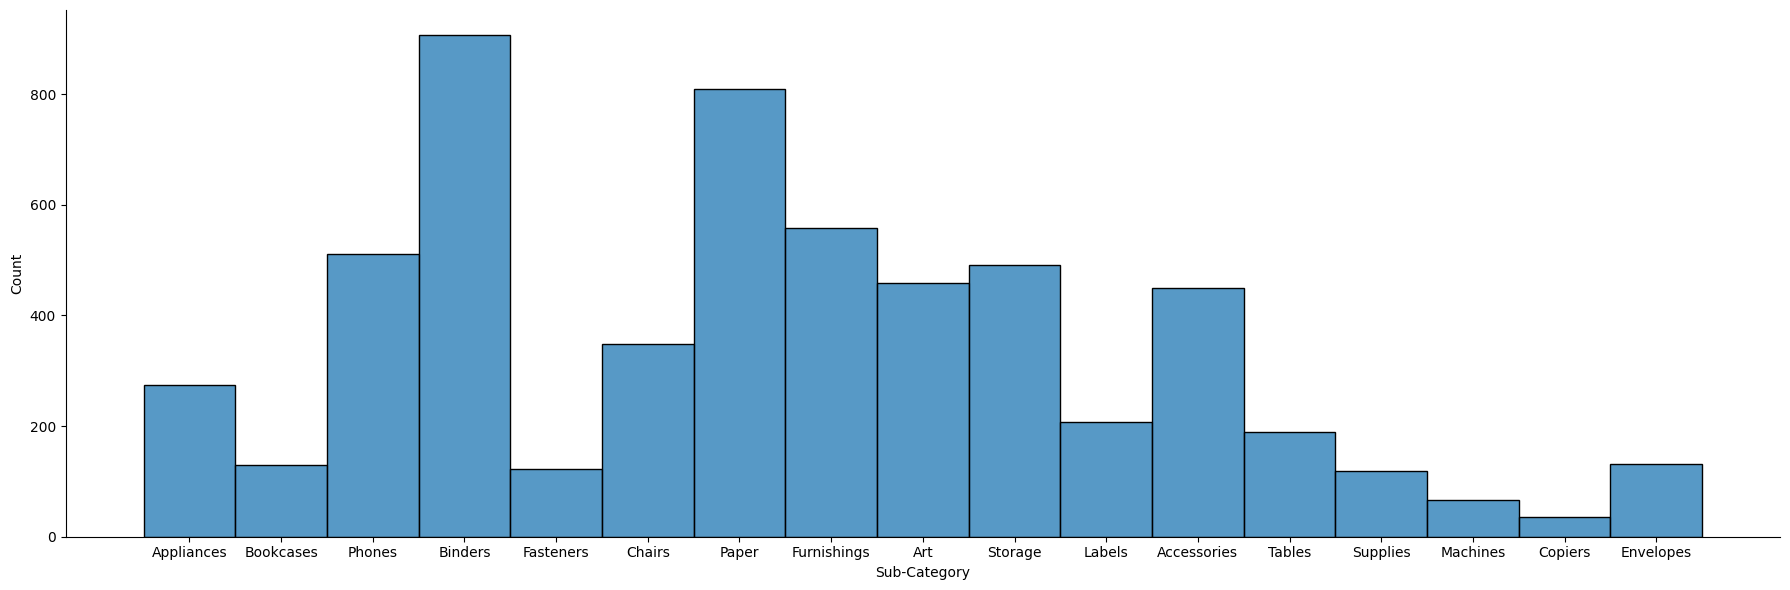

In [278]:
# Построим график для последних двух лет
df_last_two_years = df[df['Order Date'] >= '2016-12-30']
sns.displot(df_last_two_years['Sub-Category'], height=6, aspect=3)
df_last_two_years['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,496
Paper,454
Furnishings,310
Phones,291
Storage,283
Art,282
Accessories,266
Chairs,188
Appliances,161


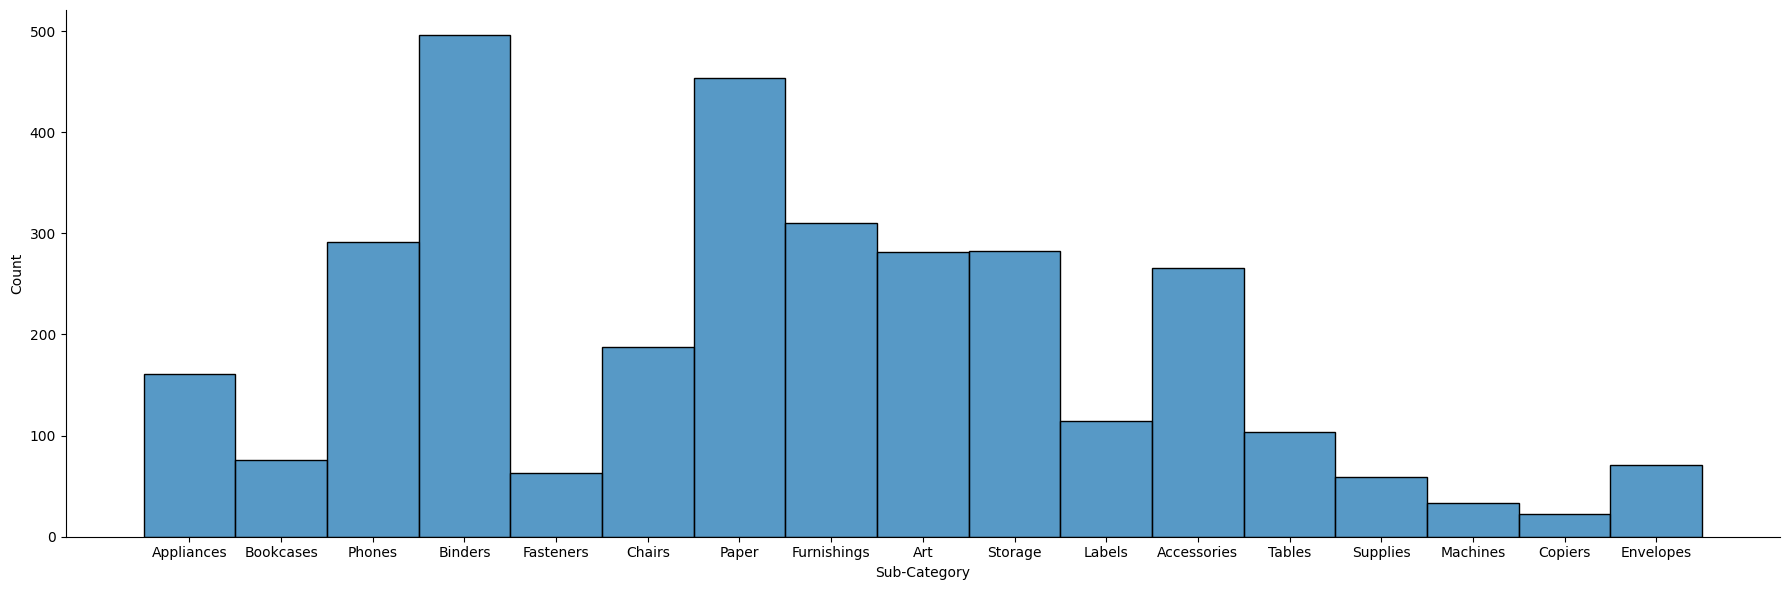

In [279]:
# Построим график для последнего года
df_last_year = df[df['Order Date'] >= '2017-12-30']
sns.displot(df_last_year['Sub-Category'], height=6, aspect=3)
df_last_year['Sub-Category'].value_counts()

M 22882.06
СКО 12601.999815243944


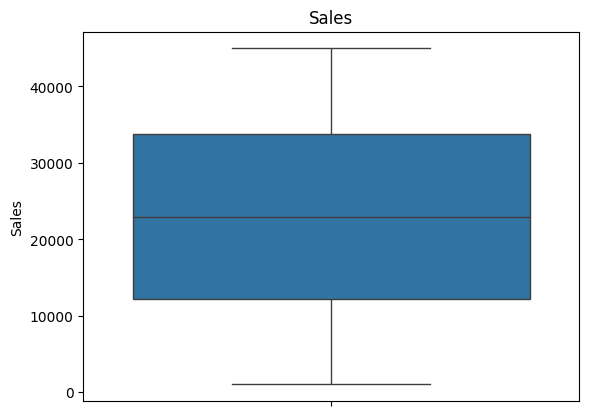

In [280]:
sns.boxplot(df['Sales']).set_title('Sales')
M = df['Sales'].median()
sigma = df['Sales'].std()
print("M", M)
print("СКО", sigma)

22882.06

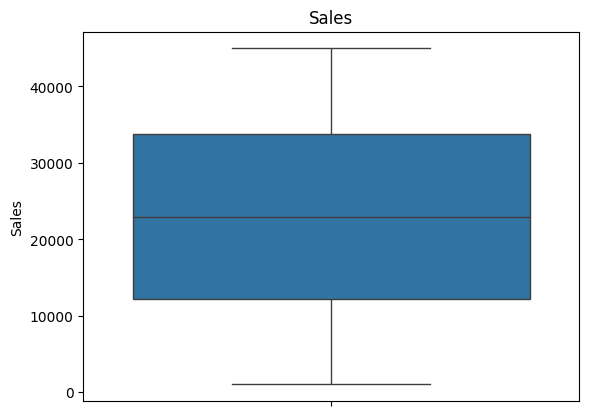

In [281]:
# Заменяем выбросы
df.loc[(df['Sales'] <= M - 3*sigma) | (df['Sales'] >= M + 3*sigma), 'Sales'] = df['Sales'].median()
sns.boxplot(df['Sales']).set_title('Sales')
df['Sales'].median()
# МО не поменялось

In [282]:
# Разобьем на группы по продажам
df['Sale_group'] = pd.cut(df['Sales'], bins=3, labels=False)
df
# 0 - small;  1 - average ;  2 - high

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,2
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,1
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.0,0
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,1
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,0
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.05,0
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.81,1
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,0


In [283]:
group_df = df.groupby(['Region', 'Sale_group']).agg({'Sales': ['sum', 'mean', 'median', 'min', 'max', 'count']})
group_df

Sales                                     \
                                sum          mean     median       min   
Region      Sale_group                                                   
Владивосток 0           7862072.555   8302.082951   8289.795  1003.082   
            1           20641092.62  23088.470492  23063.745  15671.52   
            2           35449521.71  37552.459439   37431.55   30350.8   
Калиниград  0           8889168.063   8555.503429   8660.463  1021.104   
            1           25680862.64  23135.912288   23133.44  15670.85   
            2           37360269.02  37699.565106   37556.83  30339.08   
Москва      0           4287843.364   8245.852623   8099.622  1012.536   
            1           12648114.08  23080.500146   23180.55   15668.8   
            2           19955694.07  37652.252962  37759.545  30346.04   
Урал        0           6434909.756    8389.71285   8653.412  1002.794   
            1           17588614.03  22961.637115  22685.375  15740.69   
            2           27835063.91  37412.720309  37377.205  30334.84   

                                        
                             max count  
Region      Sale_group                  
Владивосток 0           15658.86   947  
            1           30326.24   894  
            2           44990.44   944  
Калиниград  0           15651.07  1039  
            1           30319.03  1110  
            2           44986.26   991  
Москва      0           15663.45   520  
            1           30328.97   548  
            2           44995.41   530  
Урал        0           15653.63   767  
            1           30323.42   766  
            2           44942.31   744

In [284]:
# Отфильтруем по сумме продаж
group_df['Sales'].sort_values(by='sum')

,,sum,mean,median,min,max,count
Region,Sale_group,,,,,,
Москва,0,4287843.364,8245.852623,8099.622,1012.536,15663.45,520
Урал,0,6434909.756,8389.71285,8653.412,1002.794,15653.63,767
Владивосток,0,7862072.555,8302.082951,8289.795,1003.082,15658.86,947
Калиниград,0,8889168.063,8555.503429,8660.463,1021.104,15651.07,1039
Москва,1,12648114.08,23080.500146,23180.55,15668.8,30328.97,548
Урал,1,17588614.03,22961.637115,22685.375,15740.69,30323.42,766
Москва,2,19955694.07,37652.252962,37759.545,30346.04,44995.41,530
Владивосток,1,20641092.62,23088.470492,23063.745,15671.52,30326.24,894
Калиниград,1,25680862.64,23135.912288,23133.44,15670.85,30319.03,1110


In [285]:
# Отфильтруем по средней
group_df['Sales'].sort_values(by='mean')

,,sum,mean,median,min,max,count
Region,Sale_group,,,,,,
Москва,0,4287843.364,8245.852623,8099.622,1012.536,15663.45,520
Владивосток,0,7862072.555,8302.082951,8289.795,1003.082,15658.86,947
Урал,0,6434909.756,8389.71285,8653.412,1002.794,15653.63,767
Калиниград,0,8889168.063,8555.503429,8660.463,1021.104,15651.07,1039
Урал,1,17588614.03,22961.637115,22685.375,15740.69,30323.42,766
Москва,1,12648114.08,23080.500146,23180.55,15668.8,30328.97,548
Владивосток,1,20641092.62,23088.470492,23063.745,15671.52,30326.24,894
Калиниград,1,25680862.64,23135.912288,23133.44,15670.85,30319.03,1110
Урал,2,27835063.91,37412.720309,37377.205,30334.84,44942.31,744


In [286]:
# Отфильтруем по максимальной
group_df['Sales'].sort_values(by='max')

,,sum,mean,median,min,max,count
Region,Sale_group,,,,,,
Калиниград,0,8889168.063,8555.503429,8660.463,1021.104,15651.07,1039
Урал,0,6434909.756,8389.71285,8653.412,1002.794,15653.63,767
Владивосток,0,7862072.555,8302.082951,8289.795,1003.082,15658.86,947
Москва,0,4287843.364,8245.852623,8099.622,1012.536,15663.45,520
Калиниград,1,25680862.64,23135.912288,23133.44,15670.85,30319.03,1110
Урал,1,17588614.03,22961.637115,22685.375,15740.69,30323.42,766
Владивосток,1,20641092.62,23088.470492,23063.745,15671.52,30326.24,894
Москва,1,12648114.08,23080.500146,23180.55,15668.8,30328.97,548
Урал,2,27835063.91,37412.720309,37377.205,30334.84,44942.31,744


In [287]:
# Отфильтруем по минимальной
group_df['Sales'].sort_values(by='min')

sum          mean     median       min  \
Region      Sale_group                                                   
Урал        0           6434909.756    8389.71285   8653.412  1002.794   
Владивосток 0           7862072.555   8302.082951   8289.795  1003.082   
Москва      0           4287843.364   8245.852623   8099.622  1012.536   
Калиниград  0           8889168.063   8555.503429   8660.463  1021.104   
Москва      1           12648114.08  23080.500146   23180.55   15668.8   
Калиниград  1           25680862.64  23135.912288   23133.44  15670.85   
Владивосток 1           20641092.62  23088.470492  23063.745  15671.52   
Урал        1           17588614.03  22961.637115  22685.375  15740.69   
            2           27835063.91  37412.720309  37377.205  30334.84   
Калиниград  2           37360269.02  37699.565106   37556.83  30339.08   
Москва      2           19955694.07  37652.252962  37759.545  30346.04   
Владивосток 2           35449521.71  37552.459439   37431.55   30350.8   

                             max  count  
Region      Sale_group                   
Урал        0           15653.63    767  
Владивосток 0           15658.86    947  
Москва      0           15663.45    520  
Калиниград  0           15651.07   1039  
Москва      1           30328.97    548  
Калиниград  1           30319.03   1110  
Владивосток 1           30326.24    894  
Урал        1           30323.42    766  
            2           44942.31    744  
Калиниград  2           44986.26    991  
Москва      2           44995.41    530  
Владивосток 2           44990.44    944

In [288]:
# Отфильтруем по количеству продаж
group_df['Sales'].sort_values(by='count')

sum          mean     median       min  \
Region      Sale_group                                                   
Москва      0           4287843.364   8245.852623   8099.622  1012.536   
            2           19955694.07  37652.252962  37759.545  30346.04   
            1           12648114.08  23080.500146   23180.55   15668.8   
Урал        2           27835063.91  37412.720309  37377.205  30334.84   
            1           17588614.03  22961.637115  22685.375  15740.69   
            0           6434909.756    8389.71285   8653.412  1002.794   
Владивосток 1           20641092.62  23088.470492  23063.745  15671.52   
            2           35449521.71  37552.459439   37431.55   30350.8   
            0           7862072.555   8302.082951   8289.795  1003.082   
Калиниград  2           37360269.02  37699.565106   37556.83  30339.08   
            0           8889168.063   8555.503429   8660.463  1021.104   
            1           25680862.64  23135.912288   23133.44  15670.85   

                             max  count  
Region      Sale_group                   
Москва      0           15663.45    520  
            2           44995.41    530  
            1           30328.97    548  
Урал        2           44942.31    744  
            1           30323.42    766  
            0           15653.63    767  
Владивосток 1           30326.24    894  
            2           44990.44    944  
            0           15658.86    947  
Калиниград  2           44986.26    991  
            0           15651.07   1039  
            1           30319.03   1110